In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import(
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

In [ ]:
from imblearn.over_sampling import SMOTE

# Load Data

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0,0.998273
1,0.001727


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# EDA

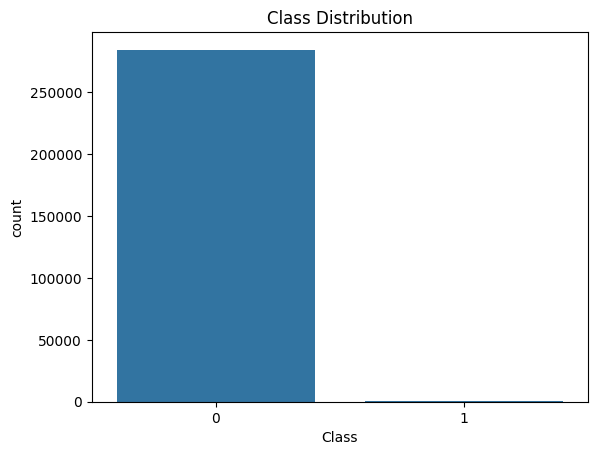

In [ ]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

# Transaction amount distribution

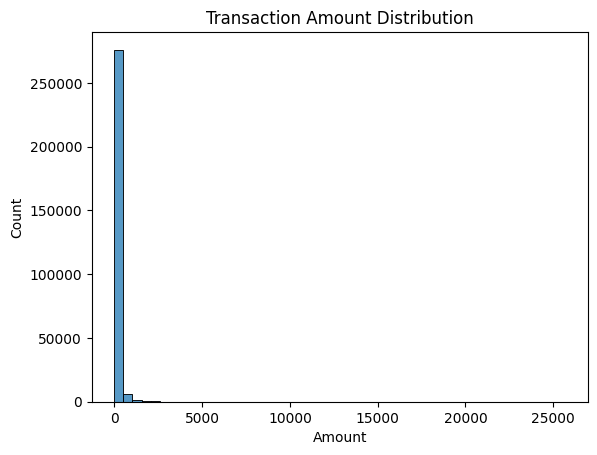

In [ ]:
sns.histplot(df['Amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()

# Fraud vs Non-Fraud Amount

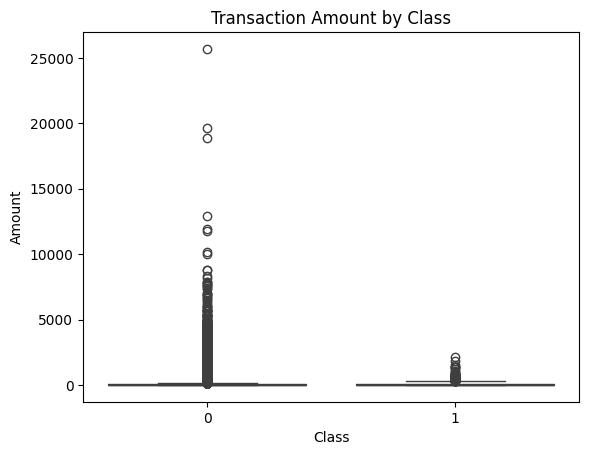

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount by Class")
plt.show()

# Feature Scaling

In [ ]:
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])

df = df.drop(['Amount'], axis=1)

In [ ]:
df['Time_scaled'] = scaler.fit_transform(df[['Time']])

df = df.drop(['Time'], axis=1)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_scaled', 'Time_scaled'],
      dtype='object')

# Train/Test split

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

Class
0    227451
1       394
Name: count, dtype: int64
Class
0    56864
1       98
Name: count, dtype: int64


# 1. Logicstic Regression

In [ ]:
lr = LogisticRegression(
    max_iter=5000,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [ ]:
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=5000, n_jobs=-1,
                   random_state=42)

In [ ]:
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
roc_auc_score(y_test, y_prob_lr)

np.float64(0.9721669425367221)

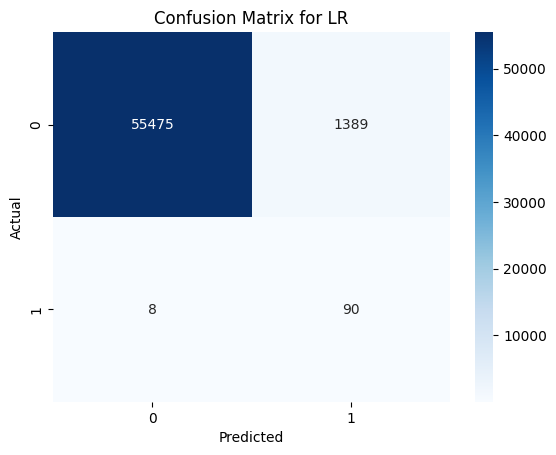

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LR")
plt.show()

# ROC Curve for LR

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)

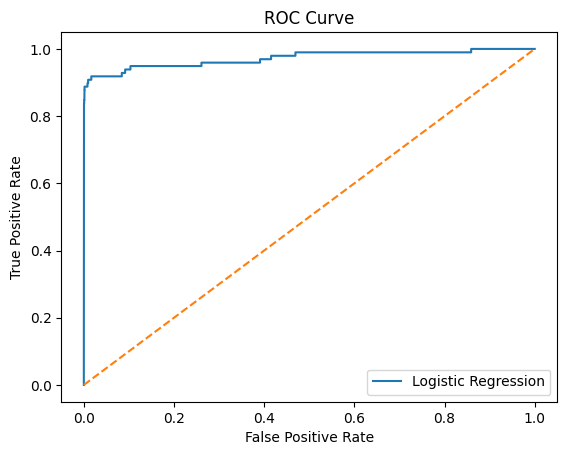

In [ ]:
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 2. Random Forest Model

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
roc_auc_score(y_test, y_prob_rf)

np.float64(0.9580765743973446)

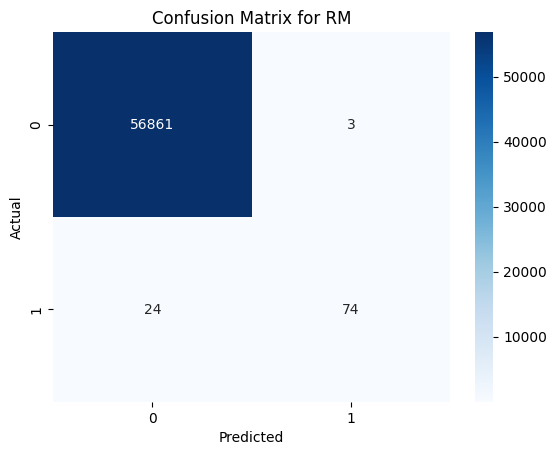

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RM")
plt.show()

# ROC Curve for RM

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

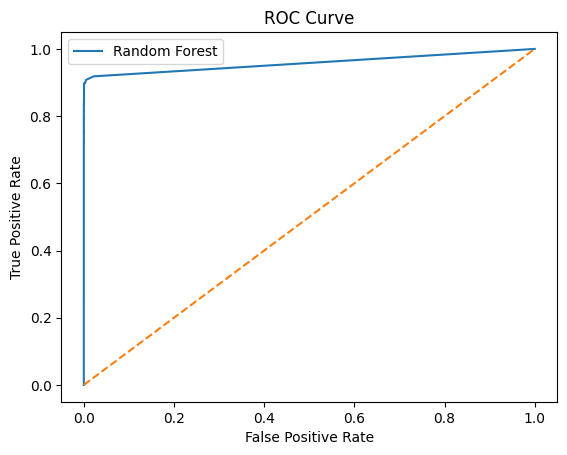

In [ ]:
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 3. Handle Imbalance - SMOTE

In [ ]:
smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
print("y train counts: ", y_train.value_counts())
print("\ny train SOMTE counts: ", y_train_sm.value_counts())

y train counts:  Class
0    227451
1       394
Name: count, dtype: int64

y train SOMTE counts:  Class
0    227451
1    227451
Name: count, dtype: int64


## Training again

In [ ]:
lr_sm = LogisticRegression(
    max_iter=5000,
    random_state=42
)

In [ ]:
lr_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=5000, random_state=42)

In [ ]:
y_pred_sm =lr_sm.predict(X_test)
y_prob_sm = lr_sm.predict_proba(X_test)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [ ]:
roc_auc_score(y_test, y_prob_sm)

np.float64(0.9698482164390798)

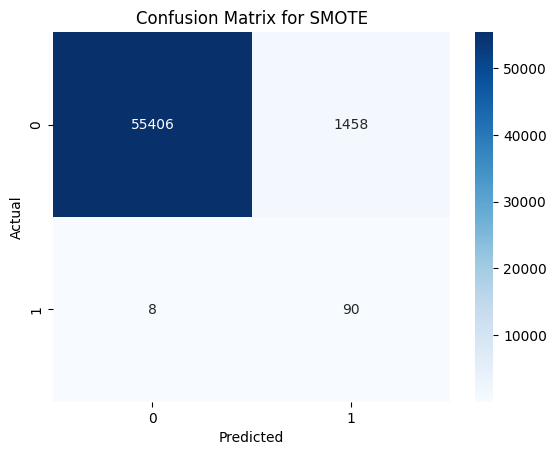

In [ ]:
cm_sm = confusion_matrix(y_test, y_pred_sm)

sns.heatmap(cm_sm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SMOTE")
plt.show()

# ROC Curve for SMOTE

In [ ]:
fpr_sm, tpr_sm, _ = roc_curve(y_test, y_prob_sm)

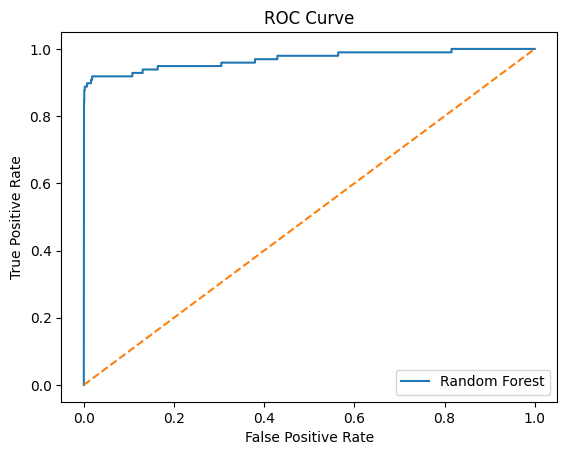

In [ ]:
plt.plot(fpr_sm, tpr_sm, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Building RandomForest with better hyperparameters

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20],
    "max_features": ["sqrt"]
}


rf_2 = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

grid = GridSearchCV(
    rf_2,
    param_grid,
    scoring="recall",
    cv=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

grid.best_params_


{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}

In [ ]:
grid.best_score_

np.float64(0.7690355329949239)

# 4. Retrain a FINAL Random Forest using the best parameters

In [ ]:
best_rf = RandomForestClassifier(
    **grid.best_params_,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

# Evaluate the tuned model on test set

In [ ]:
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]


In [ ]:
print(classification_report(y_test, y_pred_best))
roc_auc_score(y_test, y_prob_best)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



np.float64(0.9802213372687285)

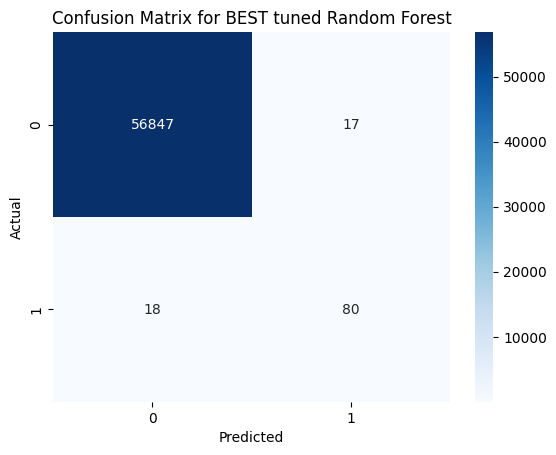

In [ ]:
cm_rf_2 = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm_rf_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for BEST tuned Random Forest")
plt.show()

In [ ]:
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)

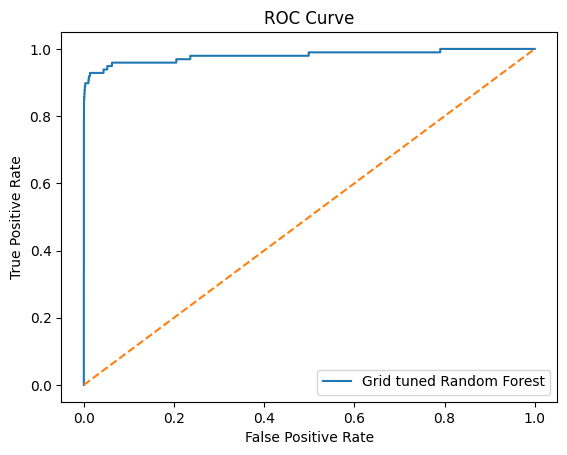

In [ ]:
plt.plot(fpr_best, tpr_best, label="Grid tuned Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Evaluating models

In [ ]:
def eval_model(y_true, y_pred, y_prob):
    return {
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, y_prob)
    }

results = pd.DataFrame({
    "LogReg": eval_model(y_test, y_pred_lr, y_prob_lr),
    "LogReg_SMOTE": eval_model(y_test, y_pred_sm, y_prob_sm),
    "RandomForest": eval_model(y_test, y_pred_rf, y_prob_rf),
    "GridSearchCV RandomForest": eval_model(y_test, y_pred_best, y_prob_best)
}).T

results


,Precision,Recall,F1,ROC_AUC
LogReg,0.060852,0.918367,0.114141,0.972167
LogReg_SMOTE,0.058140,0.918367,0.109356,0.969848
RandomForest,0.961039,0.755102,0.845714,0.958077
GridSearchCV RandomForest,0.824742,0.816327,0.820513,0.980221


In [ ]:
from sklearn.metrics import average_precision_score

def avg_precision_score_model(y_test, y_prob):
  return average_precision_score(y_test, y_prob)

avg_results = pd.DataFrame({
    "LogReg": avg_precision_score_model(y_test, y_prob_lr),
    "RandomForest": avg_precision_score_model(y_test, y_prob_rf),
    "LogReg_SMOTE": avg_precision_score_model(y_test, y_prob_sm),
    "GridSearchCV RandomForest": avg_precision_score_model(y_test, y_prob_best)
}, index=["avg_precision"])

avg_results

,LogReg,RandomForest,LogReg_SMOTE,GridSearchCV RandomForest
avg_precision,0.718946,0.865297,0.724861,0.833005


# Precision–Recall Curve (IMPORTANT FOR IMBALANCED DATA)

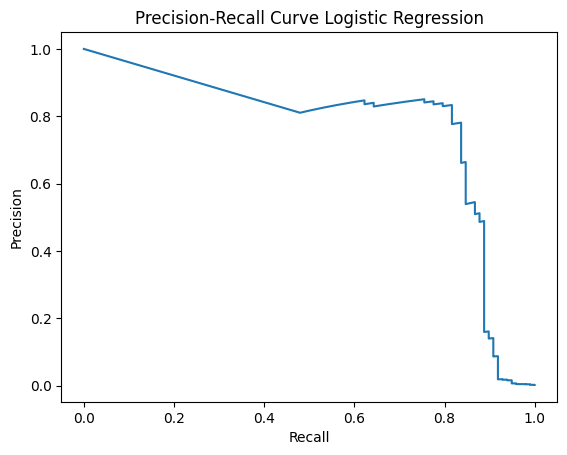

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Logistic Regression")
plt.show()


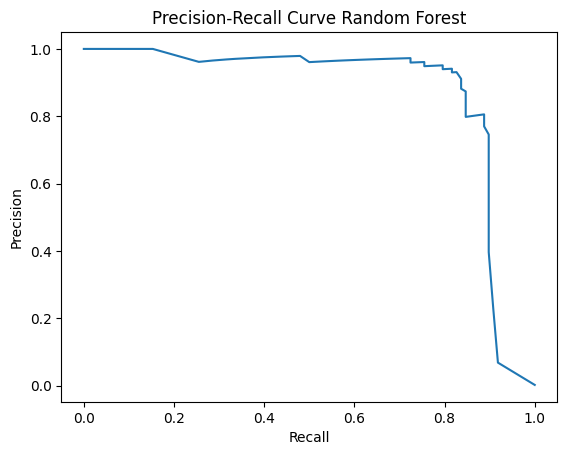

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Random Forest")
plt.show()


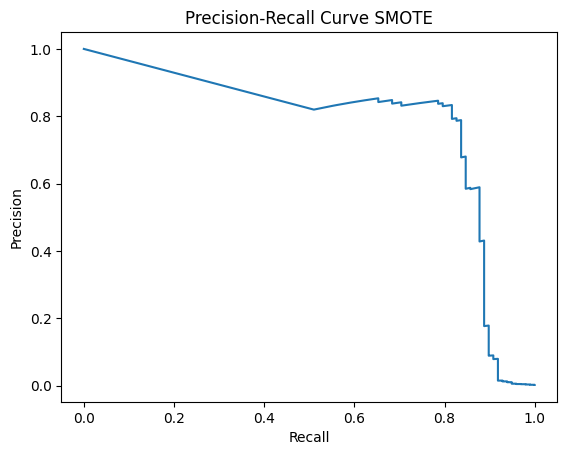

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_prob_sm)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve SMOTE")
plt.show()


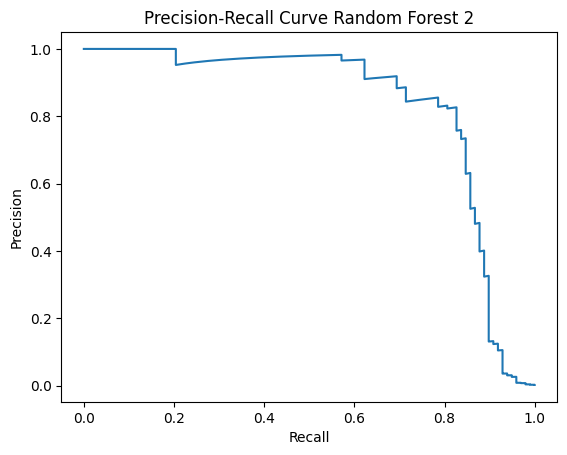

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Random Forest 2")
plt.show()


# Feature Importance Random Forest

In [ ]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)


,0
V14,0.209889
V10,0.117423
V4,0.114414
V17,0.087311
V12,0.072560
V11,0.071794
V3,0.068853
V16,0.037365
V7,0.031200
V2,0.025360


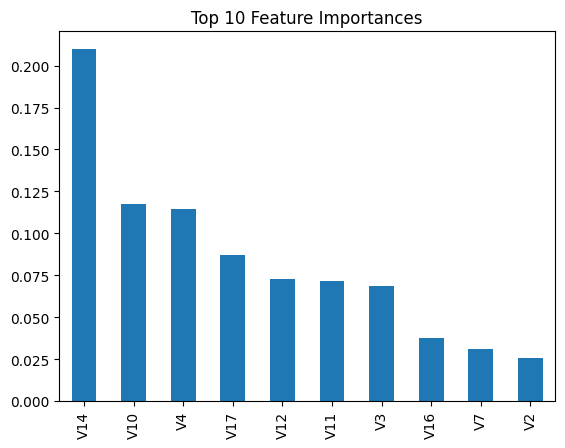

In [ ]:
importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()


# Feature Importance Random Forest 2

In [ ]:
importances_best = pd.Series(
    best_rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances_best.head(10)


,0
V14,0.219582
V10,0.123319
V4,0.104623
V17,0.089758
V12,0.072306
V11,0.070334
V3,0.062020
V16,0.042267
V7,0.031850
V2,0.029640


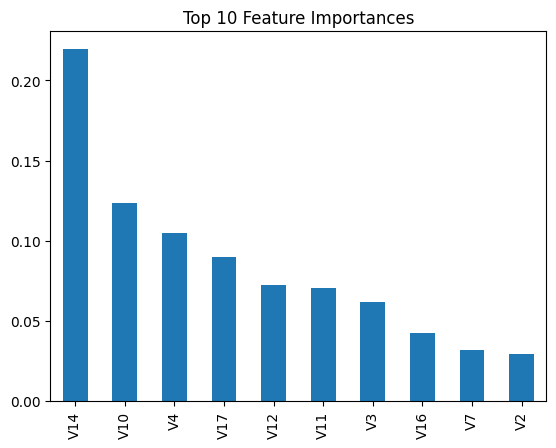

In [ ]:
importances_best.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()


# Enrich EDA & statistics

In [ ]:
df.groupby("Class")[["Amount_scaled", "Time_scaled"]].agg(
    ["mean", "median", "std"]
)

Amount_scaled                     Time_scaled                    
               mean    median       std        mean    median       std
Class                                                                  
0         -0.000234 -0.265271  0.999942    0.000513 -0.212745  0.999915
1          0.135382 -0.316247  1.026242   -0.296223 -0.405267  1.007313

## PCA feature comparison (V1, V2, V12)

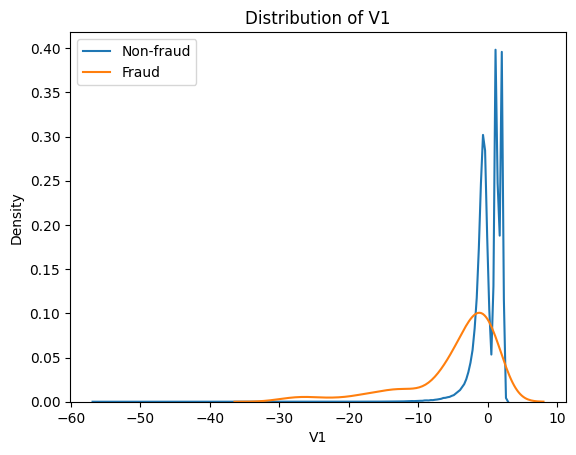

In [ ]:
sns.kdeplot(df[df["Class"]==0]["V1"], label="Non-fraud")
sns.kdeplot(df[df["Class"]==1]["V1"], label="Fraud")
plt.legend()
plt.title("Distribution of V1")
plt.show()


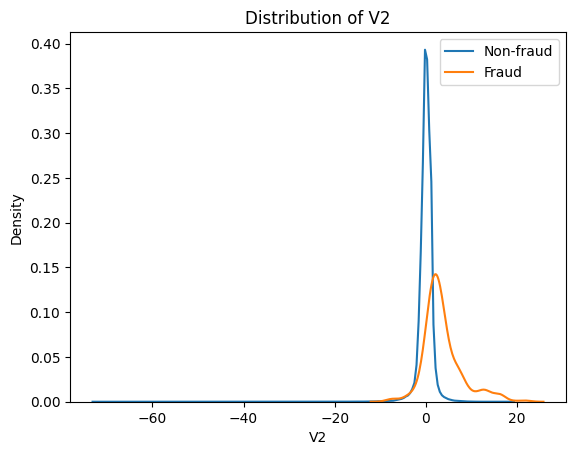

In [ ]:
sns.kdeplot(df[df["Class"]==0]["V2"], label="Non-fraud")
sns.kdeplot(df[df["Class"]==1]["V2"], label="Fraud")
plt.legend()
plt.title("Distribution of V2")
plt.show()

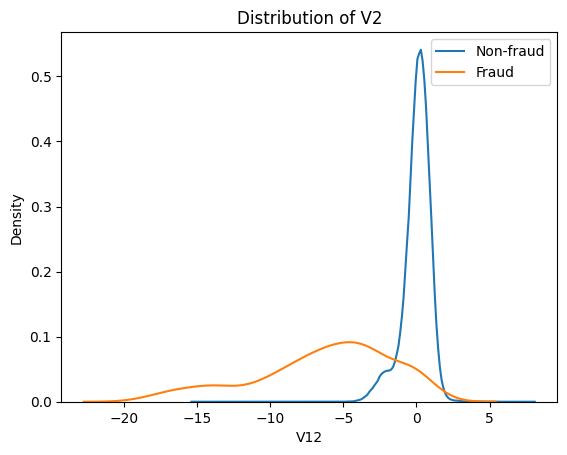

In [ ]:
sns.kdeplot(df[df["Class"]==0]["V12"], label="Non-fraud")
sns.kdeplot(df[df["Class"]==1]["V12"], label="Fraud")
plt.legend()
plt.title("Distribution of V2")
plt.show()

## Base rate (probability)

In [ ]:
df["Class"].mean()

np.float64(0.001727485630620034)

## A Mann–Whitney U test (p = 8.6×10⁻⁶) confirms a significant difference in transaction amount distributions between fraud and non-fraud cases.

In [ ]:
from scipy.stats import mannwhitneyu

fraud = df[df["Class"] == 1]["Amount_scaled"]
normal = df[df["Class"] == 0]["Amount_scaled"]

mannwhitneyu(fraud, normal, alternative="two-sided")


MannwhitneyuResult(statistic=np.float64(61833399.0), pvalue=np.float64(8.578472310840218e-06))

# Predicted labels and probabilities

In [ ]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# DataFrame of test set with predictions
test_results = X_test.copy()
test_results["true_class"] = y_test
test_results["pred_class"] = y_pred_rf
test_results["fraud_prob"] = y_prob_rf




# Show correctly detected frauds (true positives)

In [ ]:

tp = test_results[(test_results["true_class"] == 1) &
                  (test_results["pred_class"] == 1)]
tp.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled,true_class,pred_class,fraud_prob
77348,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,-4.881143,...,-0.523582,0.224228,0.756335,0.632800,0.250187,-0.353189,-0.796134,1,1,0.96
102442,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-0.639435,0.263203,-0.108877,1.269566,0.939407,-0.349231,-0.560285,1,1,0.98
119781,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,-5.515507,...,0.282030,-0.506901,-0.371741,0.615257,0.803163,0.144652,-0.405004,1,1,0.74
48094,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,-1.250286,...,-0.126644,-0.661908,-0.349793,0.454851,0.137843,-0.253677,-1.080690,1,1,0.51
42958,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,-5.486121,-14.676470,...,0.763508,0.075456,-0.453840,-1.508968,-0.686836,-0.313289,-1.126617,1,1,0.83


# Show missed frauds (false negatives)

In [ ]:

fn = test_results[(test_results["true_class"] == 1) &
                  (test_results["pred_class"] == 0)]
fn.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled,true_class,pred_class,fraud_prob
70589,-2.042608,1.573578,-2.372652,-0.572676,-2.097353,-0.174142,-3.039520,-1.634233,-0.594809,-5.459602,...,-0.600514,0.127547,-0.786072,0.606097,0.171697,0.693749,-0.860782,1,0,0.33
14170,-15.903635,10.393917,-19.133602,6.185969,-12.538021,-4.027030,-13.897827,10.662252,-2.844954,-9.668789,...,0.040404,0.995502,-0.273743,1.688136,0.527831,0.046539,-1.465965,1,0,0.26
8972,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,1.015113,...,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,0.365067,-1.735612,1,0,0.14
152019,-3.705856,4.107873,-3.803656,1.710314,-3.582466,1.469729,-9.621560,-11.913105,-0.322297,-6.625692,...,-0.255504,-0.183835,-0.584539,-0.315484,-0.097223,-0.349231,0.040076,1,0,0.32
18809,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,-2.895252,...,0.176960,-1.815638,-0.536517,0.489035,-0.049729,-0.232087,-1.369373,1,0,0.45


# Show normal transactions wrongly flagged as fraud (false positives)

In [ ]:

fp = test_results[(test_results["true_class"] == 0) &
                  (test_results["pred_class"] == 1)]
fp.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount_scaled,Time_scaled,true_class,pred_class,fraud_prob
190263,-1.272117,1.827615,-3.810610,0.583759,-0.641242,-1.389043,-1.954054,1.173920,-2.053191,-3.345061,...,0.741676,-0.173234,0.534870,0.183562,0.020316,-0.350191,0.714814,0,1,0.62
14920,-17.950631,11.067069,-20.742660,6.075531,-13.389765,-4.532888,-15.188146,12.101062,-4.026880,-9.017413,...,0.102040,1.177477,-0.238730,1.554463,0.547948,-0.349231,-1.444507,0,1,0.88
16110,-26.619952,14.845545,-27.747084,6.408105,-19.025741,-5.053209,-19.041960,17.573712,-3.695863,-8.098048,...,0.150261,1.879262,-0.225019,1.257380,0.451777,-0.349231,-1.416985,0,1,0.97
